(-0.5, 715.5, 869.5, -0.5)

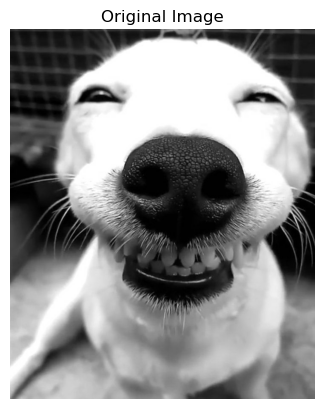

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Лабораторная работа №3
# Удаление шума с изображений в пространственной области порядковыми
# фильтрами. Использовать следующие шумы:
# 1) гауссов шум (добавить шум на изображение в Photoshop);
# 2) равномерный шум (добавить шум на изображение в Photoshop)

def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.zeros(image.shape, np.uint8)
    cv2.randn(noise, mean, sigma)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def add_uniform_noise(image, low=5, high=50):
    uniform_noise = np.random.uniform(low, high, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, uniform_noise)
    return noisy_image

def manual_median_filter_3x3(image):

    filtered_image = np.zeros_like(image)
    row = image.shape[0]
    coloumn = image.shape[1]
    for i in range(row):
        for j in range(coloumn):
            matrix = image[np.ix_([i-1,i,(i+1)%row],[j-1,j,(j+1)%coloumn])]
            # print(matrix)
            matrixArray = matrix.flatten()
            # print(matrixArray)
            matrixArray.sort()
            filtered_image[i, j] = matrixArray[4]

    return filtered_image

def manual_median_filter_5x5(image):

    filtered_image = np.zeros_like(image)
    row = image.shape[0]
    coloumn = image.shape[1]
    for i in range(row):
        for j in range(coloumn):
            matrix = image[np.ix_([i-2,i-1,i,(i+1)%row,(i+2)%row],
                                  [j-2,j-1,j,(j+1)%coloumn,(j+2)%coloumn])]
            # print(matrix)
            matrixArray = matrix.flatten()
            # print(matrixArray)
            matrixArray.sort()
            filtered_image[i, j] = matrixArray[12]

    return filtered_image


filename = 'dooog.jpg'
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
# print(image)
if image is None:
    print("Ошибка: Не удалось загрузить изображение. Проверьте путь к файлу.")

plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')


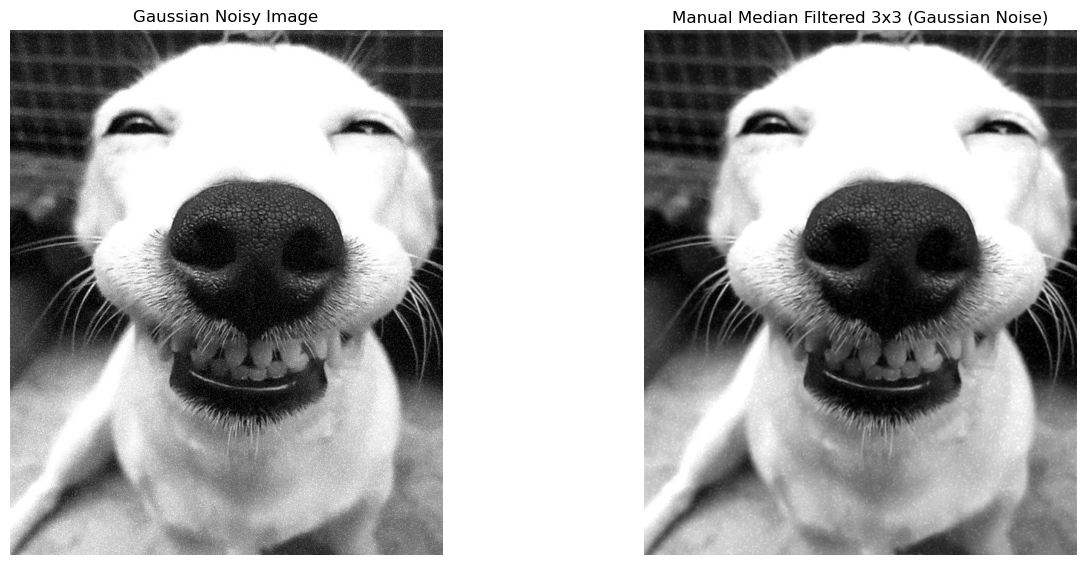

In [2]:
plt.figure(figsize=(15, 15))
# plt.figure(figsize=(image.shape[0]//10, 2*image.shape[1]//10))
gaussian_noisy_image = add_gaussian_noise(image)
plt.subplot(2,2,1)
plt.title('Gaussian Noisy Image')
plt.imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

median_filtered_gaussian = manual_median_filter_3x3(gaussian_noisy_image)
plt.subplot(2,2,2)
plt.title('Manual Median Filtered 3x3 (Gaussian Noise)')
plt.imshow(cv2.cvtColor(median_filtered_gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

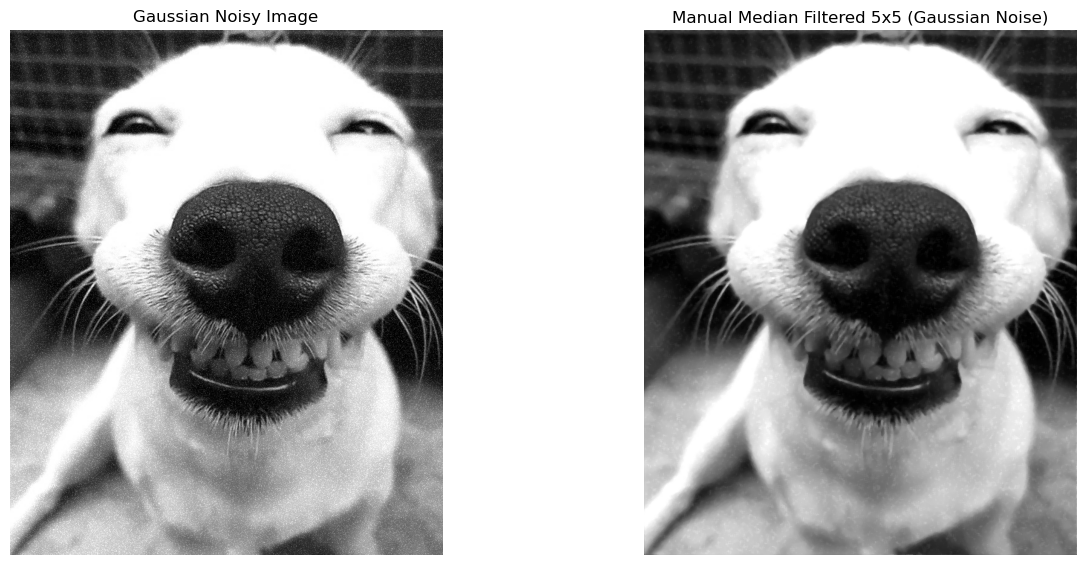

In [3]:
plt.figure(figsize=(15, 15))
# plt.figure(figsize=(image.shape[0]//5, 2*image.shape[1]//5))
# gaussian_noisy_image = add_gaussian_noise2(image)
plt.subplot(2,2,1)
plt.title('Gaussian Noisy Image')
plt.imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

median_filtered_gaussian = manual_median_filter_5x5(gaussian_noisy_image)
plt.subplot(2,2,2)
plt.title('Manual Median Filtered 5x5 (Gaussian Noise)')
plt.imshow(cv2.cvtColor(median_filtered_gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

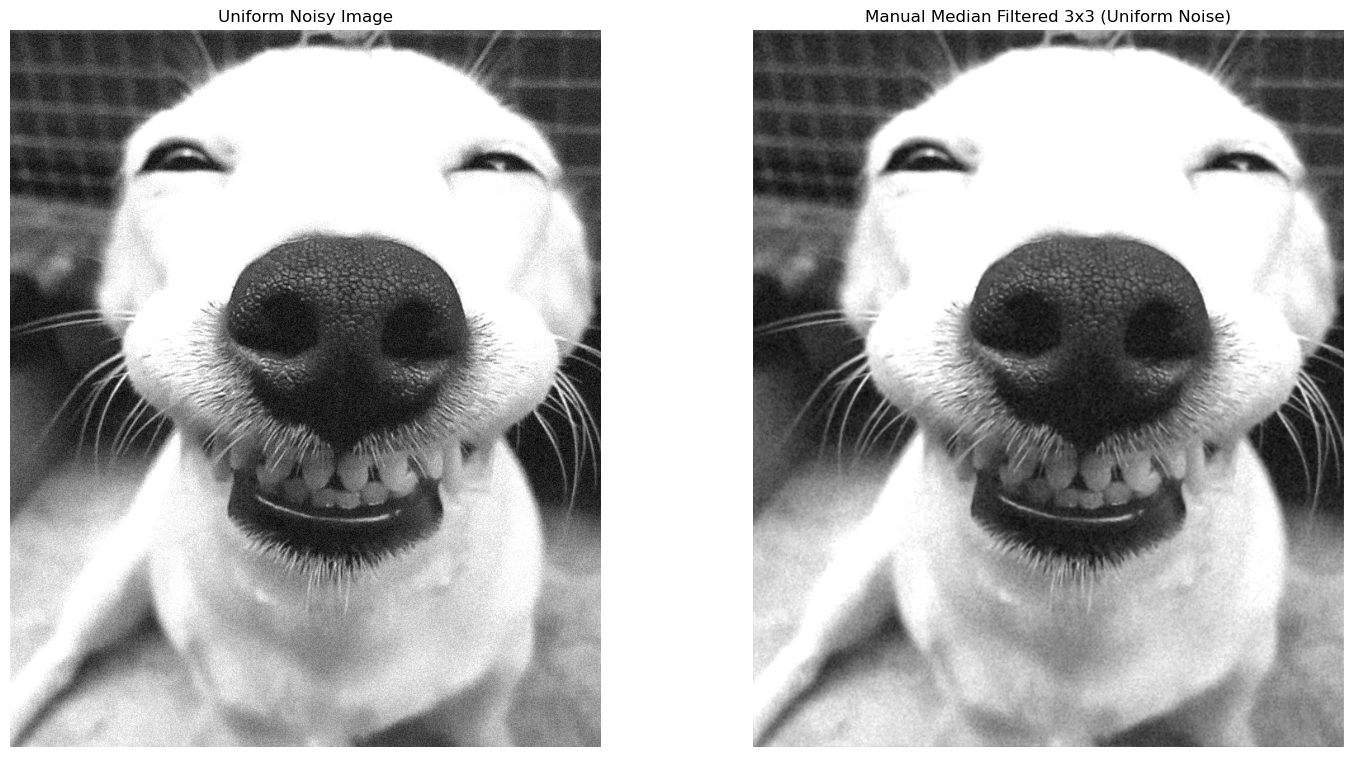

In [4]:
plt.figure(figsize=(15, 15))
uniform_noisy_image = add_uniform_noise(image)

plt.subplot(2,2,1)
plt.title('Uniform Noisy Image')
plt.imshow(cv2.cvtColor(uniform_noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

median_filtered_uniform = manual_median_filter_3x3(uniform_noisy_image)

plt.subplot(2,2,2)
plt.title('Manual Median Filtered 3x3 (Uniform Noise)')
plt.imshow(cv2.cvtColor(median_filtered_uniform, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

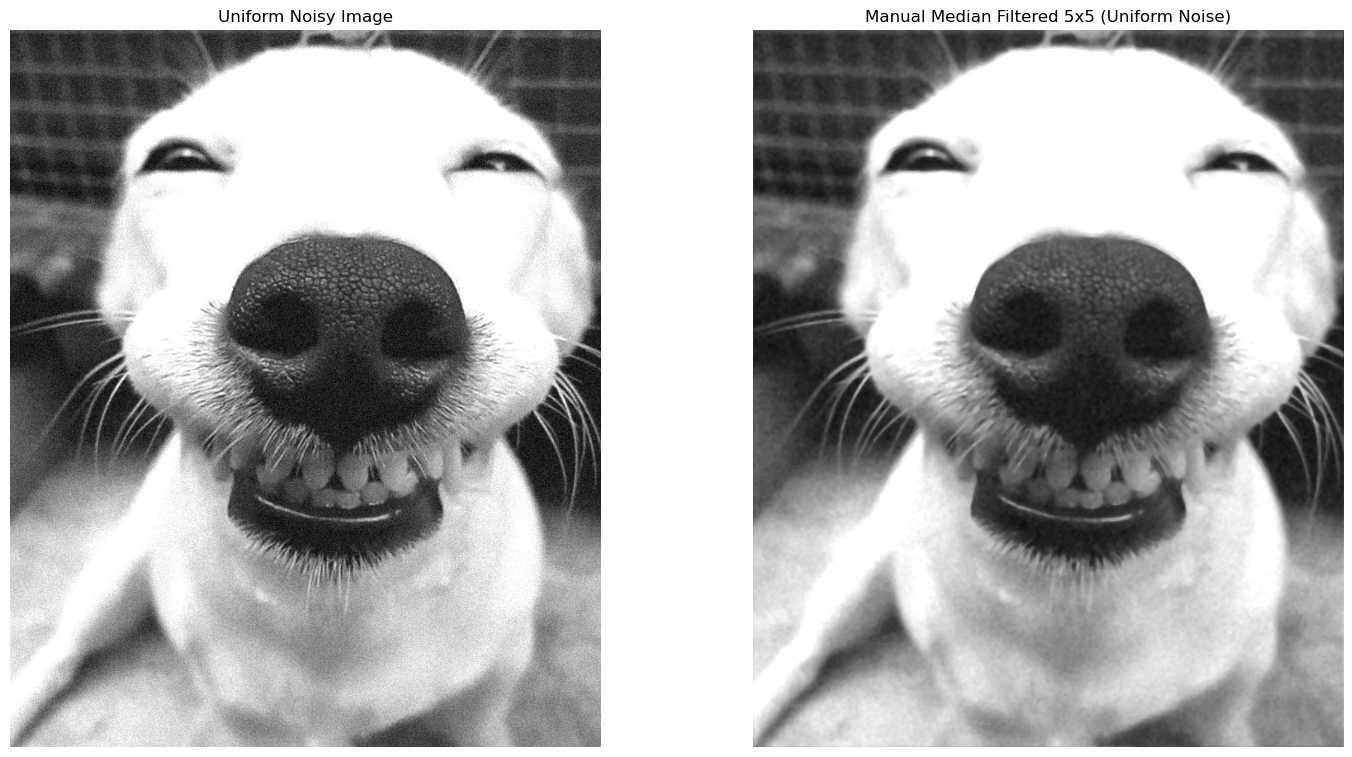

In [5]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title('Uniform Noisy Image')
plt.imshow(cv2.cvtColor(uniform_noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

median_filtered_uniform = manual_median_filter_5x5(uniform_noisy_image)

plt.subplot(2,2,2)
plt.title('Manual Median Filtered 5x5 (Uniform Noise)')
plt.imshow(cv2.cvtColor(median_filtered_uniform, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()